In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [162]:
#the code works for n > 2
#enter the disered state for example enter'0101'
state=''
n=len(state)
#for n=3 number_of_iteration=2,n=4 number_of_iteration=6, n=5 and n=6 work nicely with iteration of 3 but above that you should find the number of iteration 
number_of_iteration=1
circuit=QuantumCircuit(2*n-2,n)
circuit.h(range(n-1))
circuit.h([2*n-3])
circuit.barrier()
for j in range(number_of_iteration):
    for i in range(len(state)):
        if int(state[i])==0:
            if i==0:
                circuit.x([-1])
            else:
                circuit.x([n-1-i])  

    circuit.ccx([0],[1],[n-1])
    for i in range(1,n-2):
        circuit.ccx([i+1],[n-2+i],[n-1+i])
    circuit.cz([2*n-4],[2*n-3])
    circuit.ccx([0],[1],[n-1])
    for i in range(1,n-2):
        circuit.ccx([i+1],[n-2+1],[n-1+i])
    for i in range(len(state)):
        if int(state[i])==0:
            if i==0:
                circuit.x([-1])
            else:
                circuit.x([n-1-i])  
    circuit.barrier()
    circuit.h(range(n-1))
    circuit.h([2*n-3])
    circuit.x(range(n-1))
    circuit.x([2*n-3])
    circuit.barrier()
    circuit.ccx([0],[1],[n-1])
    for i in range(1,n-2):
        circuit.ccx([i+1],[n-2+i],[n-1+i])
    circuit.cz([2*n-4],[2*n-3])
    circuit.ccx([0],[1],[n-1])
    for i in range(1,n-2):
        circuit.ccx([i+1],[n-2+i],[n-1+i])
    circuit.barrier()
    circuit.x(range(n-1))
    circuit.x([2*n-3])
    circuit.h(range(n-1))
    circuit.h([2*n-3])
    circuit.barrier()

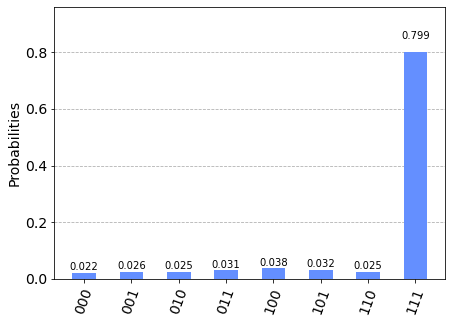

In [163]:
circuit.measure(range(n-1),range(n-1))
circuit.measure([2*n-3],[n-1])
backend=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=backend,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)

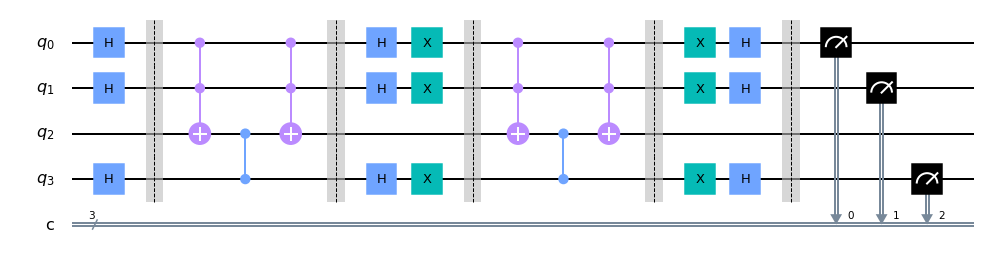

In [164]:
%matplotlib inline
circuit.draw(output='mpl')